# ALexNet Implementation

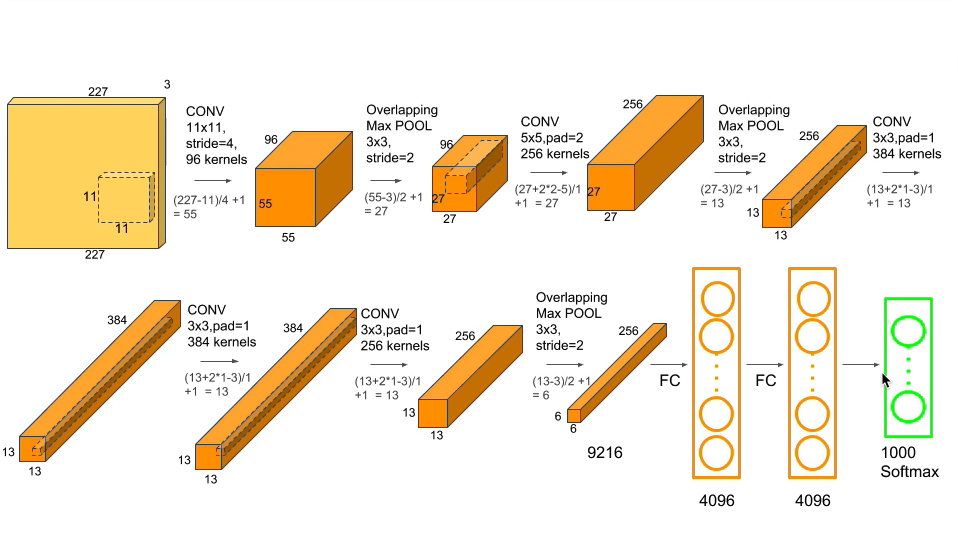

In [2]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [6]:
train_dir = './dataset/train'
test_dir = './dataset/test'

# Data Augmentation and Preprocessing

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'    
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 1275 images belonging to 2 classes.
Found 182 images belonging to 2 classes.


# Define the ALexNet Model Architecture

In [9]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential()

# Layer 1 : Convulutional + MaxPooling
model.add(Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((3,3), strides=(2,2)))

# Layer 2 : Convulutional + MaxPooling
model.add(Conv2D(256, (5,5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3,3), strides=(2,2)))

# Layer 3 : Convulutional + MaxPooling
model.add(Conv2D(384, (3,3), activation='relu', padding='same'))

# Layer 4 : Convulutional + MaxPooling
model.add(Conv2D(384, (3,3), activation='relu', padding='same'))

# Layer 5 : Convulutional + MaxPooling
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((3,3), strides=(2,2)))

# Layer 6 : Flattening
model.add(Flatten())

# Layer 7 : Full Connection
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Layer 8 : Full Connection
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(train_generator.num_classes, activation='sigmoid')) # binary classification


In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 35, 35, 96)        34944     
                                                                 
 batch_normalization_1 (Bat  (None, 35, 35, 96)        384       
 chNormalization)                                                
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 17, 17, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 17, 17, 256)       614656    
                                                                 
 batch_normalization_2 (Bat  (None, 17, 17, 256)       1024      
 chNormalization)                                                
                                                      

# Model Compilation and Training

In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=2, validation_data=(test_generator))



Epoch 1/2
40/40 [==============================] - 26s 580ms/step - loss: 0.6838 - accuracy: 0.5867 - val_loss: 0.6819 - val_accuracy: 0.5769
Epoch 2/2
40/40 [==============================] - 23s 558ms/step - loss: 0.6802 - accuracy: 0.5851 - val_loss: 0.6815 - val_accuracy: 0.5769


# Model Evaluation

In [15]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

6/6 [==============================] - 1s 120ms/step - loss: 0.6815 - accuracy: 0.5769
Test accuracy: 0.5769230723381042


# Visualizing Loss and Accuracy

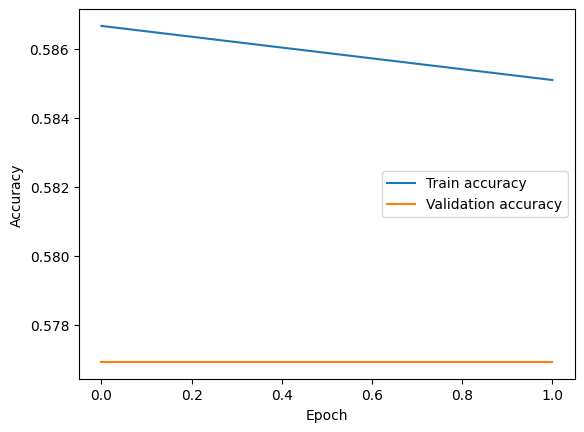

In [16]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

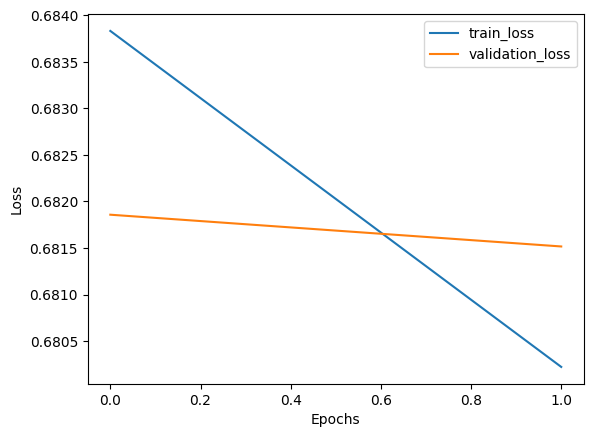

In [17]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Prediction

In [23]:
import numpy as np

def predict_image(model,image_path, class_names):
    from tensorflow.keras.preprocessing.image import load_img,img_to_array

    # Load the Image
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict the class probabilities
    predictions = model.predict(img_array)
    
    # Get the index of the predicted class
    predicted_class_index = np.argmax(predictions[0])

    # Get the predicted class name
    predicted_class = class_names[predicted_class_index]
    confidence = predictions[0][predicted_class_index]
    
    return predicted_class, confidence
    
# class names (make sure this matches your dataset classes)
class_names = ['daisy', 'dandelion']

# Example Prediction
image_path = './dataset/test/dandelion/1241011700_261ae180ca_jpg.rf.53eafd845f17fbf30ebd87b04312a4e8.jpg'
predicted_class, confidence = predict_image(model, image_path, class_names)
print(f"Predicted class: {predicted_class} with confidence: {confidence:.2f}")
       
   
    

1/1 [==============================] - 0s 46ms/step
Predicted class: dandelion with confidence: 0.55
